In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv('datasets/mnist_train.csv')

In [33]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) #shuffled for generalization

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_, m_train = x_train.shape

In [85]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def relu(z):
    return np.maximum(z, 0)

def softmax(z):
    a = np.exp(z) / sum(np.exp(z))
    return a
    
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def relu_deriv(z):
    return z > 0

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * relu_deriv(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1    
    w2 = w2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return w1, b1, w2, b2


In [86]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print("iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, y))
    return w1, b1, w2, b2


In [90]:
#Training

In [88]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.10, 1000)

iteration:  0
[2 0 2 ... 2 2 2] [8 4 4 ... 9 6 3]
0.06240677966101695
iteration:  10
[2 0 7 ... 7 7 3] [8 4 4 ... 9 6 3]
0.1375593220338983
iteration:  20
[3 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.18403389830508474
iteration:  30
[8 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.2605932203389831
iteration:  40
[8 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.32701694915254237
iteration:  50
[8 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.3788813559322034
iteration:  60
[8 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.42610169491525424
iteration:  70
[8 0 7 ... 7 1 3] [8 4 4 ... 9 6 3]
0.47615254237288135
iteration:  80
[8 0 9 ... 4 1 3] [8 4 4 ... 9 6 3]
0.525542372881356
iteration:  90
[8 0 9 ... 4 1 3] [8 4 4 ... 9 6 3]
0.567677966101695
iteration:  100
[8 0 4 ... 4 8 3] [8 4 4 ... 9 6 3]
0.6015254237288136
iteration:  110
[8 0 4 ... 4 8 3] [8 4 4 ... 9 6 3]
0.627135593220339
iteration:  120
[8 0 4 ... 4 8 3] [8 4 4 ... 9 6 3]
0.6487627118644068
iteration:  130
[8 0 4 ... 4 8 3] [8 4 4 ... 9 6 3]
0.6658474576271186
iteration:  140

In [91]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


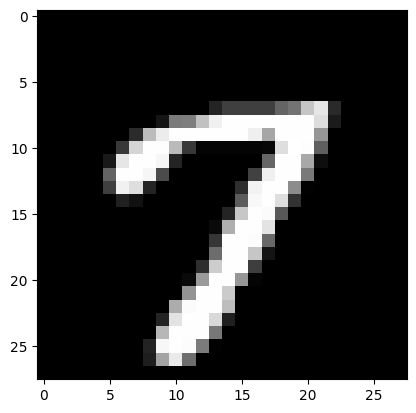

Prediction:  [5]
Label:  8


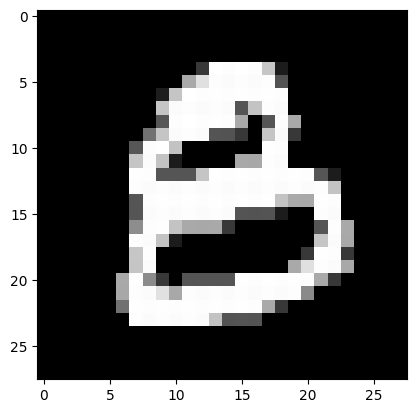

Prediction:  [7]
Label:  7


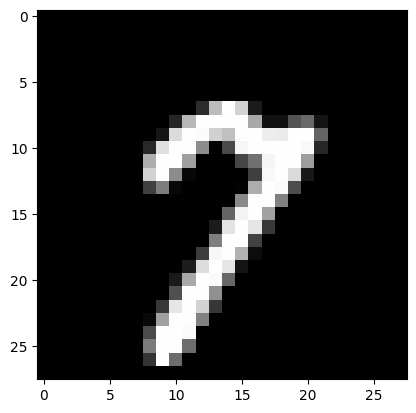

Prediction:  [9]
Label:  9


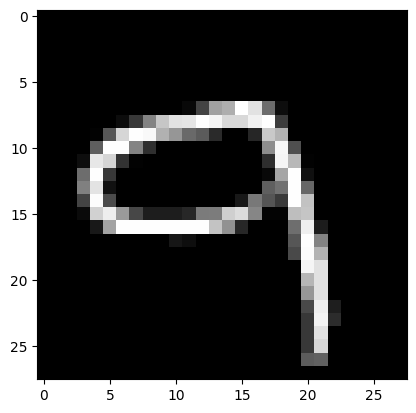

Prediction:  [9]
Label:  9


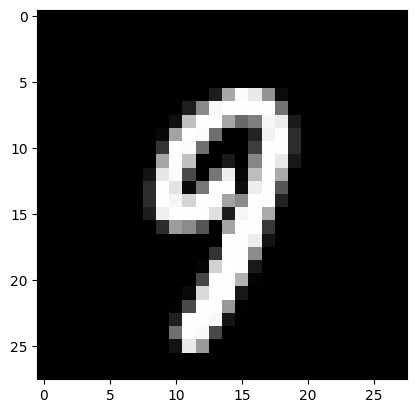

Prediction:  [1]
Label:  1


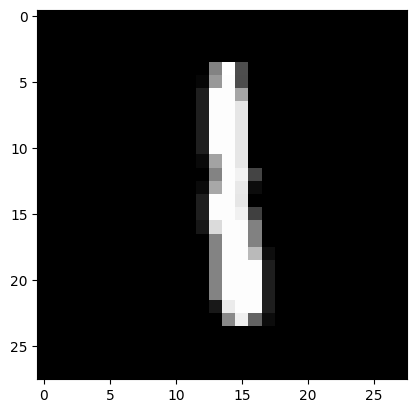

Prediction:  [1]
Label:  5


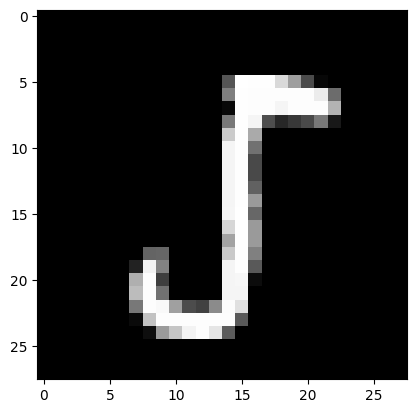

Prediction:  [6]
Label:  6


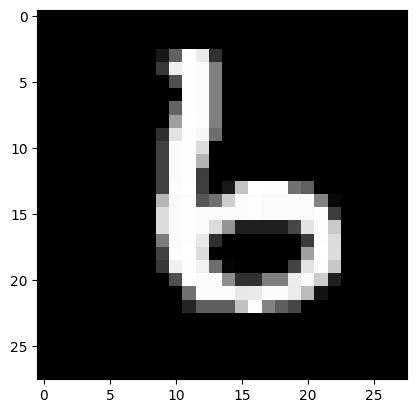

Prediction:  [5]
Label:  5


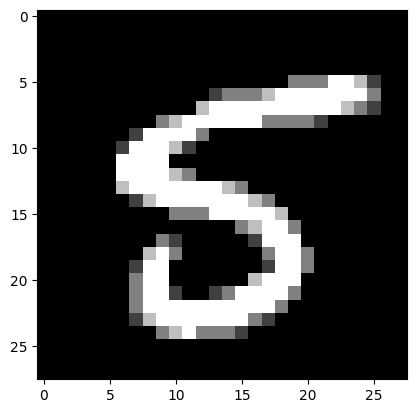

Prediction:  [0]
Label:  0


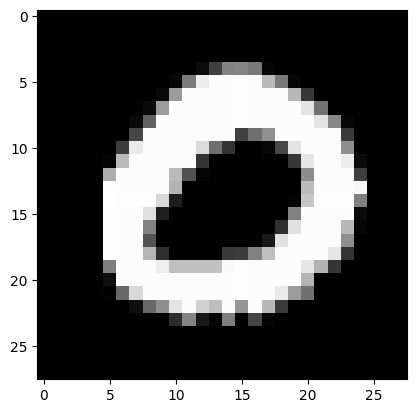

In [93]:
test_prediction(10, w1, b1, w2, b2)
test_prediction(100, w1, b1, w2, b2)
test_prediction(200, w1, b1, w2, b2)
test_prediction(333, w1, b1, w2, b2)
test_prediction(2658, w1, b1, w2, b2)
test_prediction(4238, w1, b1, w2, b2)
test_prediction(3464, w1, b1, w2, b2)
test_prediction(2674, w1, b1, w2, b2)
test_prediction(4696, w1, b1, w2, b2)
test_prediction(2581, w1, b1, w2, b2)

In [94]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[9 1 1 2 9 6 6 3 5 1 0 6 4 0 0 4 1 3 5 7 2 8 5 5 1 0 9 7 5 1 9 9 6 5 8 7 0
 3 3 3 7 3 3 5 4 5 2 7 3 4 8 1 3 9 0 4 4 8 8 9 9 0 1 3 0 8 9 9 2 1 3 2 6 1
 6 9 1 3 5 6 6 5 2 3 9 9 0 9 8 0 3 7 1 1 2 2 3 8 3 5 1 0 0 0 4 0 1 8 7 3 2
 3 6 5 9 4 8 1 9 3 7 8 9 2 2 4 7 0 0 6 7 8 7 8 2 1 8 4 8 9 9 8 1 8 0 6 0 2
 4 7 1 5 8 6 9 9 4 8 8 6 3 5 0 2 7 3 1 3 4 7 8 1 5 7 4 5 8 2 1 6 1 3 1 9 7
 1 0 9 4 7 1 3 6 0 3 6 6 6 0 3 8 1 6 8 4 1 8 3 2 8 9 2 3 2 3 7 8 5 8 6 8 5
 3 1 3 2 6 8 9 1 3 7 3 6 2 8 7 4 4 7 9 1 5 4 4 9 1 7 1 7 9 1 9 1 2 9 3 8 0
 2 8 7 7 9 0 7 1 5 3 6 1 7 9 2 8 8 5 8 7 4 1 9 6 5 6 5 8 6 7 3 9 4 7 4 7 8
 0 0 4 1 0 7 4 8 6 8 3 9 4 0 9 3 6 6 8 9 9 3 1 8 2 1 6 9 4 3 9 2 7 2 9 9 2
 7 5 0 5 5 0 1 9 9 6 8 9 9 1 7 3 3 3 6 8 6 0 2 6 8 9 4 1 1 8 2 8 9 7 5 5 2
 9 8 5 1 9 7 2 0 0 2 9 0 4 5 0 2 3 4 1 3 2 0 5 3 4 4 9 8 9 3 8 6 2 8 5 1 8
 2 4 6 7 9 1 7 0 0 6 2 0 4 1 5 6 0 6 7 1 6 8 3 2 3 8 8 5 3 2 6 7 8 9 0 5 0
 5 7 1 2 1 8 7 2 2 5 8 7 4 9 4 0 7 9 0 8 2 9 6 6 0 0 7 0 4 7 3 9 8 7 8 6 1
 6 4 0 7 4 5 7 9 3 2 3 2 

0.876